# PCA Implementation and Analysis

Implementation of Principal Component Analysis for dimensionality reduction and data exploration.

# Principal Component Analysis (PCA)

What we do in this notebook:
1. Load the toy PCA dataset
2. Standardize the data
3. Compute the covariance matrix
4. Perform eigendecomposition
5. Project data onto principal components
6. Visualize and interpret results

## imports / setup
here we import all libraries we need.

if something is missing in your venv, install like this (in terminal):
```bash
pip install pandas numpy matplotlib scikit-learn
```

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# make plots a little nicer size
plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["figure.dpi"] = 120


## config (paths and small settings)
all file paths and constants live in this cell. if file path changes, we only edit here.


In [18]:
input_file_pca = "../data/pca_toy.txt"  # PCA toy dataset (tab separated)
input_file_ms  = "../data/ms_toy.txt"   # will be used in part 2 (missing data)

n_components_to_keep = 2  # we only care about PC1 and PC2

## load dataset
we load the file into a pandas DataFrame.
the file is TSV (tab-separated). first row is header.

then we:
- print shape (rows, columns)
- show first 5 rows


In [19]:
data = pd.read_csv(input_file_pca, sep="\t", header=0)

print("data shape:", data.shape)
display(data.head())


data shape: (100, 4)


,a,b,c,d
0,-2.137,3.000,0.450,10.142
1,-3.017,1.971,-1.822,8.615
2,-2.032,1.892,-0.647,8.402
3,-2.453,1.686,-2.711,8.238
4,-1.613,0.000,-1.059,7.978


## basic stats before PCA (for question (a))
here we check raw stats of each column:
- mean
- std (standard deviation)
- min / max

reason: PCA uses variance. if one column has bigger numeric scale, that column will dominate PCA. we want to see if columns have different scale.

this will help us explain why we standardize (question (a)).


In [20]:
stats = data.describe()
display(stats)


,a,b,c,d
count,100.000000,100.000000,100.000000,100.000000
mean,-2.811780,2.081500,-0.810400,9.107260
std,1.459608,1.306282,1.370276,1.466917
min,-6.890000,0.000000,-3.491000,6.016000
25%,-3.404000,1.235250,-1.858000,7.956500
50%,-2.648000,2.563500,-0.803000,9.437000
75%,-1.851000,3.000000,-0.023250,10.158750
max,-0.390000,3.951000,2.583000,11.685000


## standardize (z-score)
now we standardize each variable:

formula:
```text
x_scaled = (x - mean) / std
```

after this step:
- each column has mean ~0
- each column has std ~1

why we do this:
- PCA finds direction of max variance.
- if one feature has large numbers and one has small numbers, PCA will care more about the large-number feature.
- after scaling, all features have same scale, so PCA is fair.

this is directly question (a).


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # returns numpy array

data_scaled = pd.DataFrame(X_scaled, columns=data.columns)

# check that mean ~0, std ~1 now
display(data_scaled.describe())


,a,b,c,d
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-4.740652e-16,2.120526e-16,1.909584e-16,1.105782e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.808127e+00,-1.601482e+00,-1.966103e+00,-2.117934e+00
25%,-4.077830e-01,-6.510948e-01,-7.683690e-01,-7.884274e-01
50%,1.127735e-01,3.708451e-01,5.427578e-03,2.259168e-01
75%,6.615612e-01,7.066831e-01,5.773402e-01,7.204139e-01
max,1.667557e+00,1.438371e+00,2.488911e+00,1.766103e+00


## run PCA and plot PC1 vs PC2
now we run PCA on the scaled data.
we only keep 2 principal components (PC1 and PC2)

we then:
- save the projection of each sample on PC1 and PC2
- show first rows
- make the scatter plot PC1 vs PC2 (this is question (b))




first rows of scores in PC1/PC2 space:


,PC1,PC2
0,0.806625,0.910559
1,-0.112469,-0.604745
2,-0.178405,-0.404424
3,-0.053479,-1.430351
4,-1.034232,-1.356144


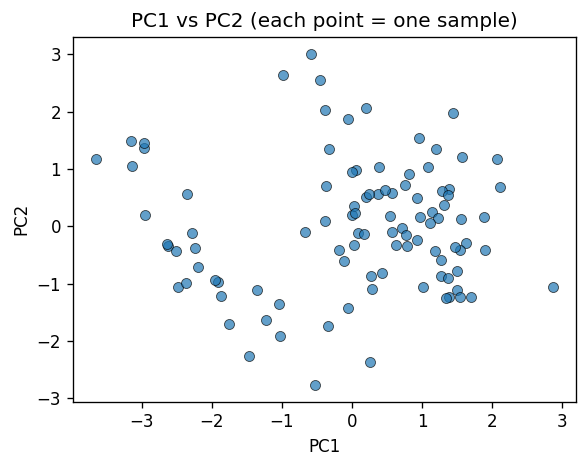

In [22]:
pca = PCA(n_components=n_components_to_keep)
principal_components = pca.fit_transform(data_scaled)

pc_cols = [f"PC{i+1}" for i in range(n_components_to_keep)]
pca_scores = pd.DataFrame(principal_components, columns=pc_cols)

print("first rows of scores in PC1/PC2 space:")
display(pca_scores.head())

fig, ax = plt.subplots(figsize=(5,4), dpi=120)

ax.scatter(
    pca_scores["PC1"],
    pca_scores["PC2"],
    alpha=0.7,
    edgecolor="k",
    linewidth=0.5
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PC1 vs PC2 (each point = one sample)")

fig.tight_layout()

# save using the fig handle
fig.savefig("pca_scatter_pc1_pc2.png", dpi=150, bbox_inches="tight")

plt.show()



## PCA loadings and explained variance
in this step we answer:
- question (c): which variables are most important for PC1 and PC2?
- question (d): how much variance is explained by PC1 and PC2?

what we do:
1. **loadings**:
   - `pca.components_` gives a weight for each original variable.
   - bigger absolute value = bigger contribution to that PC.
   - we look at which variables have the largest |loading| for PC1 and PC2.

2. **explained_variance_ratio_**:
   - this tells how much total variance is captured by each PC.
   - we print PC1 %, PC2 %, and sum.


In [23]:
# loadings: rows = PC1, PC2 ; columns = original features (a,b,c,d)
loadings = pd.DataFrame(
    pca.components_,
    index=pc_cols,
    columns=data.columns
)

print("loadings (variable weights for each PC):")
display(loadings)

for pc in loadings.index:
    print(f"\nTop contributors to {pc} (sorted by absolute value):")
    print(loadings.loc[pc].abs().sort_values(ascending=False))

# explained variance ratio (percentage of variance each PC explains)
explained_var = pca.explained_variance_ratio_
print("\nexplained variance ratio:")
for i, ratio in enumerate(explained_var, start=1):
    print(f"PC{i}: {ratio*100:.2f}%")

total_2pcs = explained_var.sum()*100
print(f"\nPC1 + PC2 together: {total_2pcs:.2f}% of total variance")


loadings (variable weights for each PC):


,a,b,c,d
PC1,0.435723,0.611375,-0.274560,0.600818
PC2,-0.505384,0.335501,0.713285,0.351072



Top contributors to PC1 (sorted by absolute value):
b    0.611375
d    0.600818
a    0.435723
c    0.274560
Name: PC1, dtype: float64

Top contributors to PC2 (sorted by absolute value):
c    0.713285
a    0.505384
d    0.351072
b    0.335501
Name: PC2, dtype: float64

explained variance ratio:
PC1: 54.56%
PC2: 31.16%

PC1 + PC2 together: 85.73% of total variance


## when do we use more PCs?
this is question (e).

idea:
- sometimes PC1 and PC2 do not explain enough variance.
- then we maybe need PC3, PC4, ...

here we run PCA again with all components. we check cumulative variance. this tells us how many PCs we need to reach a high percent (for example 70%, 80%, etc.).


explained variance ratio for each PC:
PC1: 54.56%
PC2: 31.16%
PC3: 12.18%
PC4: 2.09%

cumulative explained variance:
PC1..PC1: 54.56%
PC1..PC2: 85.73%
PC1..PC3: 97.91%
PC1..PC4: 100.00%


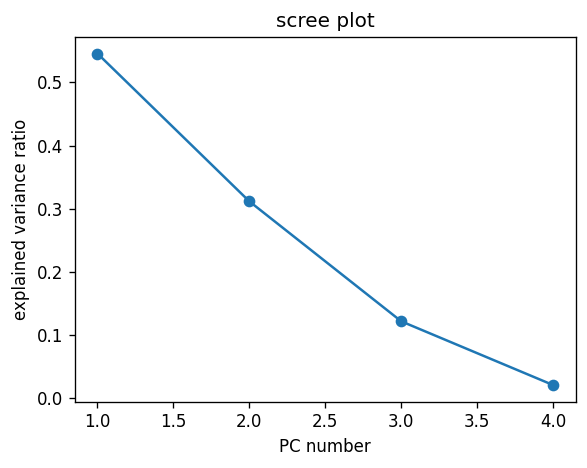

In [24]:
pca_full = PCA()  # keep all PCs
pca_full.fit(data_scaled)

all_expl = pca_full.explained_variance_ratio_
cum_expl = np.cumsum(all_expl)

print("explained variance ratio for each PC:")
for i, r in enumerate(all_expl, start=1):
    print(f"PC{i}: {r*100:.2f}%")

print("\ncumulative explained variance:")
for i, r in enumerate(cum_expl, start=1):
    print(f"PC1..PC{i}: {r*100:.2f}%")

# simple scree style plot (variance per PC)
plt.plot(range(1, len(all_expl)+1), all_expl, marker='o')
plt.xlabel("PC number")
plt.ylabel("explained variance ratio")
plt.title("scree plot")
plt.tight_layout()
plt.show()


# Results and Analysis

### (a) Data Standardization

Standardizing the data ensures that each feature contributes equally to the PCA, preventing features with larger scales from dominating the principal components.
